<a href="https://colab.research.google.com/github/oanumnu/MIS-64061_oanumnu./blob/main/tensorboard_and_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [66]:
import keras
keras.__version__

'2.4.3'

In [67]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [68]:
max([max(sequence) for sequence in train_data])

9999

In [70]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [71]:
x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [72]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

run the original model implementing tensorboard

In [74]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="C:/AdvML/log", histogram_freq=1)
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[tb_callback])


Epoch 1/20
30/30 [==============================] - 2s 54ms/step - loss: 0.6393 - accuracy: 0.6158 - val_loss: 0.4855 - val_accuracy: 0.7792
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3988 - accuracy: 0.8777 - val_loss: 0.3379 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2632 - accuracy: 0.9197 - val_loss: 0.3071 - val_accuracy: 0.8758
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1980 - accuracy: 0.9406 - val_loss: 0.2908 - val_accuracy: 0.8814
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1591 - accuracy: 0.9505 - val_loss: 0.2812 - val_accuracy: 0.8881
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1231 - accuracy: 0.9656 - val_loss: 0.2964 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0986 - accuracy: 0.9747 - val_loss: 0.3002 - val_accuracy: 0.8853
Epoch 8/20
30

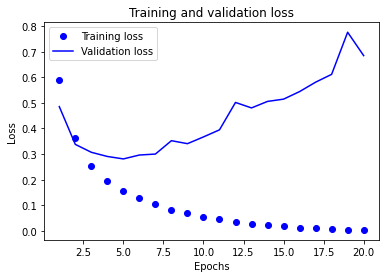

In [75]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

run the original model implementing Checkpoint





In [76]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks_list)




Epoch 1/20
30/30 [==============================] - 2s 46ms/step - loss: 0.5931 - accuracy: 0.7005 - val_loss: 0.3891 - val_accuracy: 0.8710

Epoch 00001: val_accuracy improved from -inf to 0.87100, saving model to weights-improvement-01-0.87.hdf5
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3280 - accuracy: 0.8995 - val_loss: 0.3136 - val_accuracy: 0.8809

Epoch 00002: val_accuracy improved from 0.87100 to 0.88090, saving model to weights-improvement-02-0.88.hdf5
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2385 - accuracy: 0.9266 - val_loss: 0.2866 - val_accuracy: 0.8855

Epoch 00003: val_accuracy improved from 0.88090 to 0.88550, saving model to weights-improvement-03-0.89.hdf5
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1824 - accuracy: 0.9433 - val_loss: 0.2868 - val_accuracy: 0.8845

Epoch 00004: val_accuracy did not improve from 0.88550
Epoch 5/20
30/30 [==============================] - 1

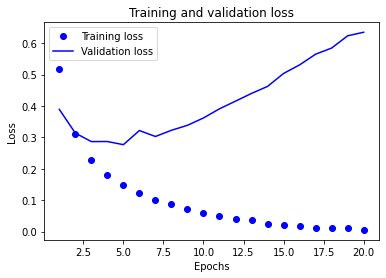

In [77]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

With Check point, vaildation accuracy increased form epochs 1,2,3 and 5

epoch 1 - accuracy increased from 0.7792 to 0.8710

epoch 2 - accuracy increased from 0.8710 to 0.8809

epoch 3 - accuracy increased from 0.8758 to 0.8855

epoch 5 - accuracy increased from 0.8881 to 0.8888